In [1]:
import pandas as pd


In [2]:

# Replace 'filename.csv' with your file path
df = pd.read_csv('test_results.csv')
df.head(10)

,transformer,num_samples,fit_duration,transform_duration
0,Numpy,100000,0.130553,1.618655
1,NumbaV0,100000,0.148184,4.227832
2,NumbaV1,100000,2.395400,1.703057
3,Cython,100000,0.139562,0.258216
4,Numpy,200000,0.252285,2.910235
5,NumbaV0,200000,0.254140,8.857245
6,NumbaV1,200000,3.079102,3.278086
7,Cython,200000,0.259161,0.499498
8,Numpy,400000,0.556029,10.622445
9,NumbaV0,400000,0.495627,7.449992


In [3]:
df.groupby(["num_samples", "transformer"]).describe().T

num_samples                 100000                                  200000  \
transformer                 Cython   NumbaV0   NumbaV1     Numpy    Cython   
fit_duration       count  5.000000  5.000000  5.000000  5.000000  5.000000   
                   mean   0.141768  0.145897  2.532334  0.133558  0.256581   
                   std    0.014977  0.013496  0.125907  0.002722  0.004207   
                   min    0.131052  0.123277  2.395400  0.130553  0.249347   
                   25%    0.131876  0.146732  2.441225  0.131704  0.256465   
                   50%    0.138692  0.148184  2.518318  0.133149  0.258509   
                   75%    0.139562  0.152413  2.594774  0.134944  0.259161   
                   max    0.167657  0.158879  2.711954  0.137440  0.259421   
transform_duration count  5.000000  5.000000  5.000000  5.000000  5.000000   
                   mean   0.261878  4.394596  1.858295  1.007048  0.542756   
                   std    0.006044  0.326027  0.100566  0.349560  0.070094   
                   min    0.255457  4.108973  1.703057  0.796971  0.495453   
                   25%    0.258216  4.140755  1.849660  0.818559  0.499498   
                   50%    0.261642  4.227832  1.872882  0.821943  0.510758   
                   75%    0.262668  4.716339  1.883315  0.979113  0.544833   
                   max    0.271408  4.779083  1.982561  1.618655  0.663236   

num_samples                                               400000            \
transformer                NumbaV0   NumbaV1     Numpy    Cython   NumbaV0   
fit_duration       count  5.000000  5.000000  5.000000  5.000000  5.000000   
                   mean   0.270364  2.924063  0.257963  0.506190  0.502397   
                   std    0.038693  0.439099  0.006985  0.009771  0.004052   
                   min    0.250436  2.595840  0.252285  0.499560  0.495627   
                   25%    0.251786  2.602974  0.252936  0.500361  0.502146   
                   50%    0.254140  2.716110  0.255483  0.502140  0.503814   
                   75%    0.255985  3.079102  0.259835  0.505749  0.504182   
                   max    0.339475  3.626289  0.269277  0.523141  0.506218   
transform_duration count  5.000000  5.000000  5.000000  5.000000  5.000000   
                   mean   6.089936  2.748234  2.077872  1.748851  6.782690   
                   std    1.698192  0.417978  0.516209  0.739502  0.601337   
                   min    4.686573  2.317600  1.666461  1.132154  6.044320   
                   25%    5.157496  2.415231  1.692292  1.250582  6.469947   
                   50%    5.186632  2.647853  1.895105  1.316839  6.597447   
                   75%    6.561733  3.082399  2.225268  2.225977  7.351743   
                   max    8.857245  3.278086  2.910235  2.818702  7.449992   

num_samples                                    
transformer                NumbaV1      Numpy  
fit_duration       count  5.000000   5.000000  
                   mean   2.947151   0.507655  
                   std    0.148931   0.037849  
                   min    2.827636   0.454762  
                   25%    2.851229   0.497052  
                   50%    2.919665   0.501694  
                   75%    2.936374   0.528740  
                   max    3.200853   0.556029  
transform_duration count  5.000000   5.000000  
                   mean   4.874503   6.099746  
                   std    2.097509   2.678380  
                   min    3.695379   3.657172  
                   25%    3.966954   4.680781  
                   50%    3.978637   5.624460  
                   75%    4.114791   5.913872  
                   max    8.616755  10.622445

In [4]:
df = df.groupby(["num_samples", "transformer"]).mean().reset_index()
df["total_duration"] = df["fit_duration"] + df["transform_duration"]
df


,num_samples,transformer,fit_duration,transform_duration,total_duration
0,100000,Cython,0.141768,0.261878,0.403646
1,100000,NumbaV0,0.145897,4.394596,4.540493
2,100000,NumbaV1,2.532334,1.858295,4.390629
3,100000,Numpy,0.133558,1.007048,1.140606
4,200000,Cython,0.256581,0.542756,0.799336
5,200000,NumbaV0,0.270364,6.089936,6.360300
6,200000,NumbaV1,2.924063,2.748234,5.672297
7,200000,Numpy,0.257963,2.077872,2.335835
8,400000,Cython,0.506190,1.748851,2.255041
9,400000,NumbaV0,0.502397,6.782690,7.285087


In [5]:
results = []
for grp in df.groupby('num_samples'):
    df_g = grp[1]
    df_g["total_speedup"] = df_g[df_g.transformer == "Numpy"]["total_duration"].values[0] / df_g["total_duration"]
    results.append(df_g)

results_df = pd.concat(results)
# results_df = results_df[results_df.num_samples != 1000]
results_df

,num_samples,transformer,fit_duration,transform_duration,total_duration,total_speedup
0,100000,Cython,0.141768,0.261878,0.403646,2.825757
1,100000,NumbaV0,0.145897,4.394596,4.540493,0.251208
2,100000,NumbaV1,2.532334,1.858295,4.390629,0.259782
3,100000,Numpy,0.133558,1.007048,1.140606,1.000000
4,200000,Cython,0.256581,0.542756,0.799336,2.922218
5,200000,NumbaV0,0.270364,6.089936,6.360300,0.367252
6,200000,NumbaV1,2.924063,2.748234,5.672297,0.411797
7,200000,Numpy,0.257963,2.077872,2.335835,1.000000
8,400000,Cython,0.506190,1.748851,2.255041,2.930059
9,400000,NumbaV0,0.502397,6.782690,7.285087,0.906976


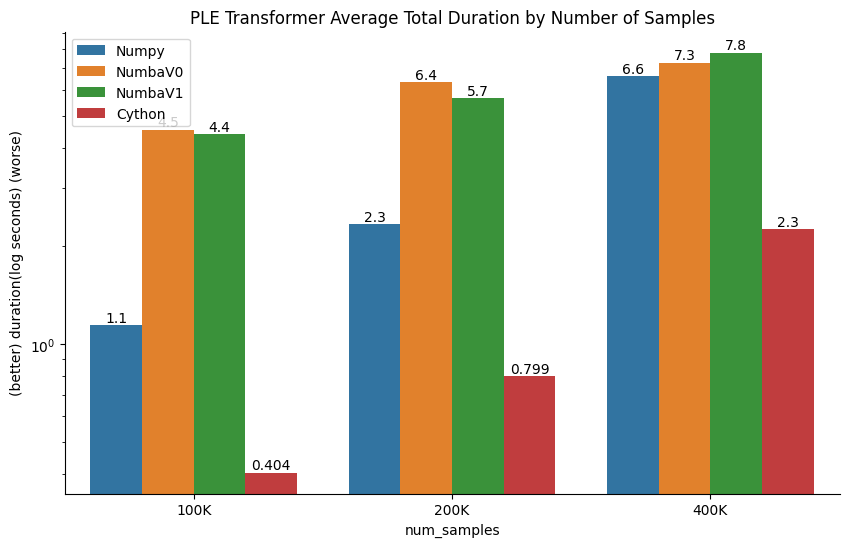

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your order
hue_order = ['Numpy', 'NumbaV0', 'NumbaV1', 'Cython']

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='num_samples', 
    y='total_duration', 
    hue='transformer',
    hue_order=hue_order, 
    data=results_df
)

# Loop over the bars
p_id = 0
for p in barplot.patches:
    p_id += 1
    if p_id > 12:
        break
    # Get the height of the bar (which is also its value)
    height = p.get_height()
    # Write the value on top of the bar
    barplot.text(x=p.get_x() + p.get_width() / 2., y=height,
                 s='{:.3f}'.format(height) if height < 1 else '{:.1f}'.format(height),
                 ha='center', va='bottom')


sns.despine()  # Remove the top and right spines from plot

# Format x-axis labels
x_labels = [
    f"{float(barplot.get_xticklabels()[i].get_text())/1e3:.0f}K" for i in range(len(barplot.get_xticklabels()))
]
plt.xticks(range(len(x_labels)), x_labels)


plt.yscale('log')
plt.ylabel('(better) duration(log seconds) (worse)')
plt.title('PLE Transformer Average Total Duration by Number of Samples')

# Move legend to upper left
plt.legend(loc='upper left')

plt.savefig('ple_transformer_total_duration.png')
plt.show()

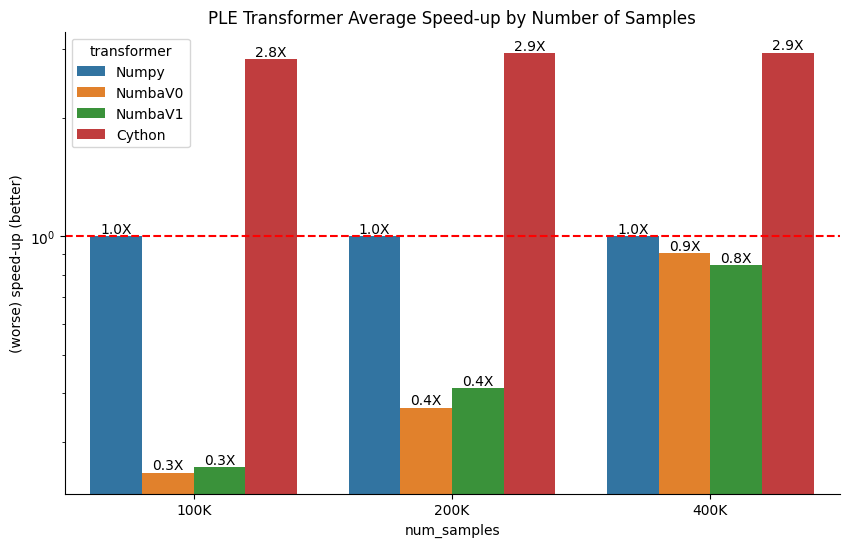

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
barplot = sns.barplot(
    x='num_samples', 
    y='total_speedup', 
    hue='transformer', 
    data=results_df,
    hue_order=hue_order,
)

plt.axhline(1, color='r', linestyle='--')

sns.despine()

# Loop over the bars
p_id = 0
for p in barplot.patches:
    p_id += 1
    if p_id > 12:
        break
    height = p.get_height()
    barplot.text(x=p.get_x() + p.get_width() / 2., y=height,
                 s='{:.1f}'.format(height) + "X",
                 ha='center', va='bottom')

plt.ylabel('(worse) speed-up (better)')
plt.yscale('log')
plt.title('PLE Transformer Average Speed-up by Number of Samples')

# Format x-axis labels
x_labels = [
    f"{float(barplot.get_xticklabels()[i].get_text())/1e3:.0f}K" for i in range(len(barplot.get_xticklabels()))
]
plt.xticks(range(len(x_labels)), x_labels)

plt.savefig('ple_transformer_speedup.png')
plt.show()

In [8]:
results_df.head()

,num_samples,transformer,fit_duration,transform_duration,total_duration,total_speedup
0,100000,Cython,0.141768,0.261878,0.403646,2.825757
1,100000,NumbaV0,0.145897,4.394596,4.540493,0.251208
2,100000,NumbaV1,2.532334,1.858295,4.390629,0.259782
3,100000,Numpy,0.133558,1.007048,1.140606,1.000000
4,200000,Cython,0.256581,0.542756,0.799336,2.922218


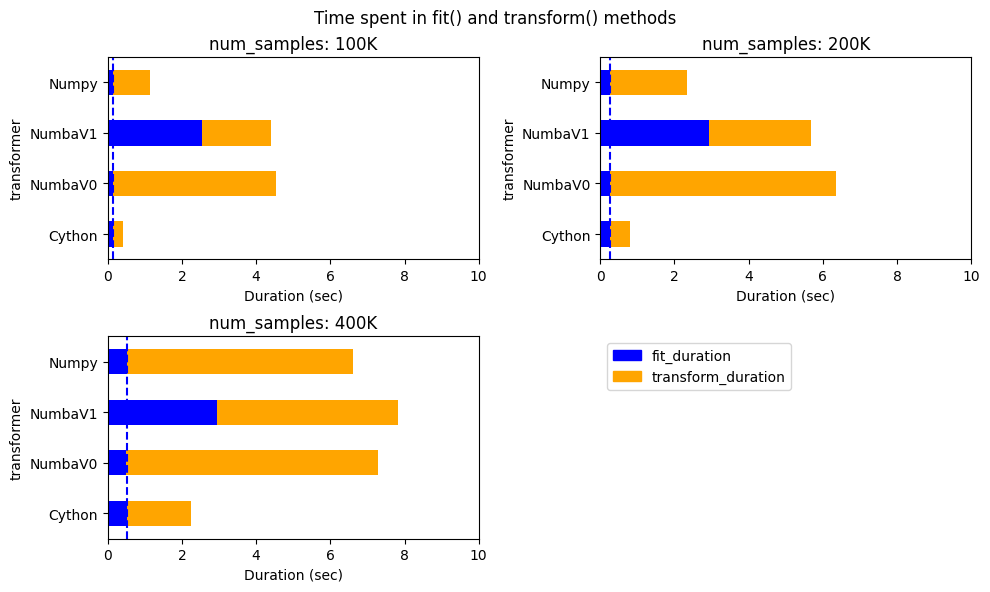

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming results_df is your DataFrame and it has been defined earlier
# Get the unique transformers
num_samples = results_df['num_samples'].unique()

fig, axs = plt.subplots(2, 2, figsize=(10,6))

# Define the colors and labels for your legend
colors = ['blue', 'orange']  # Replace with the colors used in your bar chart
labels = ['fit_duration', 'transform_duration']  # Replace with the labels used in your bar chart

# Create a list of patches for the legend
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]

# Plot the stacked bar chart for each transformer
for i, num_sample in enumerate(num_samples):
    r = i // 2
    c = i % 2
    if r == 1 and c == 1:  # Skip the plot for axs[1, 1]
        continue
    df = results_df[results_df['num_samples'] == num_sample]
    df.pivot_table(values=['fit_duration', 'transform_duration'], index='transformer').plot(
        kind='barh', stacked=True, ax=axs[r, c], legend=False, color=colors
    )
    axs[r, c].set_title(f'num_samples: {num_sample/1e3:.0f}K')
    axs[r, c].set_xlabel('Duration (sec)')
    # axs[r, c].set_xscale('log')
    axs[r, c].set_xlim([0.0, 10])
    axs[r, c].set_ylabel('transformer')
    fit_duration = df[df.transformer == 'Numpy']['fit_duration'].values[0]
    axs[r, c].axvline(fit_duration, color='b', linestyle='--')

axs[1, 1].legend(handles=patches, loc="upper left")  # Add the legend to axs[1, 1]
axs[1, 1].axis('off')  # Remove plot boundary lines for axs[1, 1]

plt.tight_layout()
plt.suptitle("Time spent in fit() and transform() methods")
plt.subplots_adjust(top=0.9)

plt.savefig('ple_fit_transform_duration.png')
plt.show()